In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("C://Users//TOSHIBA//Downloads//BL-Flickr-Images-Book.xlsx")
df.head()

ImportError: Missing optional dependency 'fsspec'.  Use pip or conda to install fsspec.

In [2]:
to_drop = ['Edition Statement',
           'Corporate Author',
           'Corporate Contributors',
           'Former owner',
           'Engraver',
           'Contributors',
           'Issuance type',
           'Shelfmarks']

df.drop(to_drop, inplace = True, axis = 1)
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,A.\t A. A.,http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,Bradbury\t Evans & Co.,Love the Avenger. By the author of “All for Gr...,A.\t A. A.,http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,Welsh Sketches\t chiefly ecclesiastical\t to t...,A.\t E. S.,http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,[The World in which I live\t and my place in i...,A.\t E. S.,http://www.flickr.com/photos/britishlibrary/ta...


In [3]:
df['Identifier'].is_unique
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,A.\t A. A.,http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,Bradbury\t Evans & Co.,Love the Avenger. By the author of “All for Gr...,A.\t A. A.,http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,Welsh Sketches\t chiefly ecclesiastical\t to t...,A.\t E. S.,http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,[The World in which I live\t and my place in i...,A.\t E. S.,http://www.flickr.com/photos/britishlibrary/ta...


In [4]:
df['Date of Publication'].head(15)

0      1879 [1878]
1             1868
2             1869
3             1851
4             1857
5             1875
6             1872
7              NaN
8             1676
9             1679
10            1802
11            1859
12            1888
13    1839\t 38-54
14            1897
Name: Date of Publication, dtype: object

In [5]:
unwanted_characters = ['[', ',', '-']

def clean_dates(dop):
    dop = str(dop)
    if dop.startswith('[') or dop == 'nan':
        return 'Unknown'
    for character in unwanted_characters:
        if character in dop:
            character_index = dop.find(character)
            dop = dop[:character_index]
    return dop

df['Date of Publication'] = df['Date of Publication'].apply(clean_dates)

In [6]:
def clean_author_names(author):
    
    author = str(author)
    
    if author == 'nan':
        return 'Unknown'
    
    author = author.split(',')

    if len(author) == 1:
        name = filter(lambda x: x.isalpha(), author[0])
        return reduce(lambda x, y: x + y, name)
    
    last_name, first_name = author[0], author[1]

    first_name = first_name[:first_name.find('-')] if '-' in first_name else first_name
    
    if first_name.endswith(('.', '.|')):
        parts = first_name.split('.')
        
        if len(parts) > 1:
            first_occurence = first_name.find('.')
            final_occurence = first_name.find('.', first_occurence + 1)
            first_name = first_name[:final_occurence]
        else:
            first_name = first_name[:first_name.find('.')]
    
    last_name = last_name.capitalize()
    
    return f'{first_name} {last_name}'


df['Author'] = df['Author'].apply(clean_author_names)

In [7]:
def clean_title(title):
    
    if title == 'nan':
        return 'Unknown'
    
    if title[0] == '[':
        title = title[1: title.find(']')]
        
    if 'by' in title:
        title = title[:title.find('by')]
    elif 'By' in title:
        title = title[:title.find('By')]
        
    if '[' in title:
        title = title[:title.find('[')]

    title = title[:-2]
        
    title = list(map(str.capitalize, title.split()))
    return ' '.join(title)
    
df['Title'] = df['Title'].apply(clean_title)
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All For Greed,AAA,http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,Bradbury\t Evans & Co.,Love The Avenger,AAA,http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,Welsh Sketches Chiefly Ecclesiastical To The C...,AES,http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,The World In Which I Live And My Place In It,AES,http://www.flickr.com/photos/britishlibrary/ta...


In [8]:
pub = df['Place of Publication']
df['Place of Publication'] = np.where(pub.str.contains('London'), 'London',
    np.where(pub.str.contains('Oxford'), 'Oxford',
        np.where(pub.eq('Newcastle upon Tyne'),
            'Newcastle-upon-Tyne', df['Place of Publication'])))

In [9]:
df.head(25)

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London,1868,Virtue & Co.,All For Greed,AAA,http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,Bradbury\t Evans & Co.,Love The Avenger,AAA,http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,Welsh Sketches Chiefly Ecclesiastical To The C...,AES,http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,The World In Which I Live And My Place In It,AES,http://www.flickr.com/photos/britishlibrary/ta...
5,481,London,1875,William Macintosh,The World In Which I Live And My Place In It,AES,http://www.flickr.com/photos/britishlibrary/ta...
6,519,London,1872,The Author,Lagonells,AFE,http://www.flickr.com/photos/britishlibrary/ta...
7,667,Oxford,Unknown,NaN,The Coming Of Spring And Other Poems,AJAJ,http://www.flickr.com/photos/britishlibrary/ta...
8,874,London,1676,NaN,A Warning To The Inhabitants Of England And Lo...,Remaʿ,http://www.flickr.com/photos/britishlibrary/ta...
9,1143,London,1679,NaN,A Satyr Against Vertue. (a Poem: Supposed To B...,AT,http://www.flickr.com/photos/britishlibrary/ta...


In [13]:
dt = df.iloc[6799:7199]

In [23]:
dt['Place of Publication'].value_counts()[:20]

London            203
Leipzig            10
Paris              10
New York            9
Edinburgh           7
Philadelphia        5
Boston [Mass.]      5
Glasgow             4
Firenze             4
Kjøbenhavn          3
Dublin              3
Stuttgart           3
Berlin              3
Москва              2
Washington          2
Wick                2
Shrewsbury          2
Pisa                2
Amsterdam           2
Toronto             2
Name: Place of Publication, dtype: int64

<AxesSubplot: >

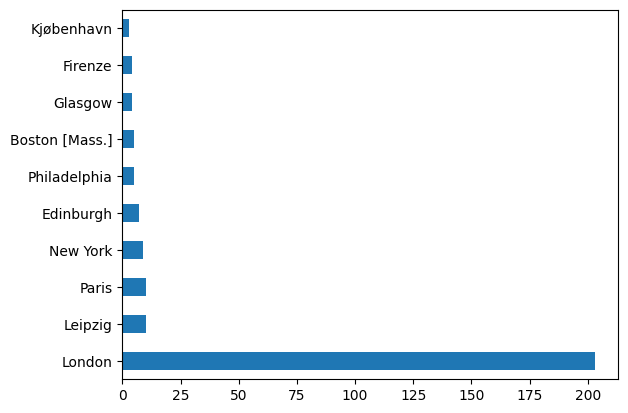

In [25]:
dt['Place of Publication'].value_counts()[:10].plot(kind='barh')

In [22]:


def plot_hor_bar(subplot, dt):
 plt.subplot(1,2,subplot
 ax=sns.countplot(y=dt["Place of Publication"], x= (dt["Place of Publication"].value_counts(),data=dt))
 plt.xticks(fontsize=40)
 plt.yticks(fontsize=40)
 ax.grid(False)
 sns.despine(left=True)
 ax.tick_params(bottom=True, left=False)
 return None

plot_hor_bar(1,book)
plt.show()


TypeError: Could not convert LondonLondonКіевъShaftesburyLondonLondonLondonLondonBasilLondonLondonLondonParisLondonLondonLondonLondonLondonLondonFirenzeLondonPisaLondonLondonLondonFirenzeLondonLondonFirenzeLeipzigFirenzeLondonLondonLondonPisaLondonLondonLondonLondonLondonLondonLondonLondonLondonLondonOxfordLondonLondonLondonLondonLondonLondonBirminghamEdinburgh & LondonCarlsruheNouvelle-YorkTorontoLondonBoston [Mass.]pp. 14. Printed for private distribution: London	 1876LondonLondonLondonLondonLondonLondonLondonPhiladelphiaLondonLondonBoston and New YorkLeipzigLondonLondonLondonParisLondon & New YorkWien1830?]LondonBoston	 U.S.A.	 & LondonCittà di CastelloLondonEdinburghNewcastle-upon-TyneLondonLondonLondonLondonGöttingenLondonLondonMelunBoston [Mass.]IpswichEdinburgh]CambridgeEdinburghLondonLondonpp. vi. 216. John Lane: London	 1897LondonSouthamptoniiShrewsburyShrewsbury2 pt. Санктпетербургъ	 1853	 54LondonLondonHull & LondonLondonLondonLondonLondonBerlinSidmouthLondonT. O. H. P. BurnhamElliot StockLondonAmsterdamLiedenHaarlemTorontoLeipzig und WienHamburgEdinburghCalcuttaValenciaGuildfordLondonParisEdinburghLondonLondon	 Glasgow [printedprinted at the Baptist Mission PressLondonGlasgowNew YorkLondonWickWickEdinburghLondonLondonDockumLondonLondonLondonWashingtonLondonLondonLondonLondonenkLondonLondonpp. xii. 254. iv. Walter Scott: London	 1886Canterburypp. xliv. 612. Griffith	 Farran & Co.: London	 1888LondonLeedsLondonLondonVe VidniLondonSalt Lake Citysold by J. Newbery; M. CooperLondon: William Andrews & Co.	 1898 [1897]LondonLondonLondon; Guildford [printed]LondonLondonLondonLondon	 Dublin [printed]LondonLondonBernard LintottLondon	 Bruges printedLondonLondonLondonNew YorkSalisburyNew YorkBoston [Mass.]Cambridge	 [Mass.]Cambridge [Mass.]LondonLondonLondonLondonGlasgowLondonLondonLondonNew YorkPortlandС.-ПетербургъPrestonLondonMiddlesbroughLondonLondonLondonB. Law	 etcWilliam P. NimmoArkste’s & MerkusLondonLondonLondonLondonLondonOxford [printed] and LondonLondonМоскваМоскваPhiladelphiaBoston [Mass.]LondonAixLondonLondonCasselKasselParisLondonLondresMadridLondon	 York [printed]LondonGothaParisStuttgartLondonLondonLondonLondonLondonLondonLondonLondonLondon [printed]	 CambridgeLondon; New York [printed]pp. 88. Digby	 Long & Co.: London	 [1895.]LondonLondonLondonLondonLondonAmsterdamLondonLondonLondonKjøbenhavnSantiagoNew YorkLondonLondonLondonRio de JaneiroParisLeipzigLondonLondon	 [1861.]LondonLeipzigLondonLondonLondonBristolLondonParisPhiladelphiaEdinburgh [printed]	 LondonLondonpp. xii. 208. J. Young & Sons: Perth	 1898LondonMéxicoMéxicoNew YorkLondonLondonLondonEdinburghLondon and AylesburyLondonLondonLondonStrassburgLondonLondonRegensburgLeipzigLondonLondonGlasgowDublinLondonLondonСанктпетербургъLondonNew YorkParisLondonLondonBelfastBerlinBerlinWashingtonLondonLondonDublinBostonLondonLondonParisΣμυρνηv PrazeArnhemLeipzigἐν ἈθηναιςMilanoChristianiaBarcelonaParisLondonLondonBirminghamColomboLondonZurichDublinLondonUngvárottCaenStuttgartKjøbenhavnLeipzigLeipzigBaselLeipzigLeipzigHusumEdinburghLewesLondonLondonLondonenkMontrealLondonCampechepp. 48. A. H. Stockwell: London	 [1922.]Boston [Mass.]Willoughby & Co.	 etcNakładem i czcionkami Breitkopfa i HaertlaLondonLondonLondonLondonMinneapolisLondonLondon	 U.S.ALondonLondonLondonLondonLondonLondonpp. ix. 85. Chatto & Windus: London	 1896LondonLondonLondonLondonLondonLondonInvernessLondonGlasgow & LondonLondonLondonVratislaviæStuttgartPhiladelphiaKjøbenhavnLondonDursleyGlasgowLondonLondonNew YorkNew YorkPhiladelphiaLondonAlbany	 N.YBurns & Oates; LondonLondonLondon to numeric